$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Im}{\mathbf{I}}
  \newcommand{\Ym}{\mathbf{Y}}
$
$\newcommand{\xv}{\mathbf{x}}
 \newcommand{\wv}{\mathbf{w}}
 \newcommand{\yv}{\mathbf{y}}
 \newcommand{\zv}{\mathbf{z}}
 \newcommand{\Chi}{\mathcal{X}}
 \newcommand{\R}{\rm I\!R}
 \newcommand{\sign}{\text{sign}}
 \newcommand{\Tm}{\mathbf{T}}
 \newcommand{\Xm}{\mathbf{X}}
 \newcommand{\Zm}{\mathbf{Z}}
 \newcommand{\Wm}{\mathbf{W}}
 \newcommand{\Ym}{\mathbf{Y}}
 \newcommand{\I}{\mathbf{I}}
 \newcommand{\muv}{\boldsymbol\mu}
 \newcommand{\Sigmav}{\boldsymbol\Sigma}
$
# Assignment #5 - Deep Learning



<font color="blue"> ARUN KUNNUMPURAM THOMAS </font>

# Overview

Describe the objective of this assignment. You can briefly state how you accompilsh it.

In this assignment , I am doing the classification of bank marketing campaign dataset using Deep feed forward, deep convolutional network and Auto encoder using tensorflow. At the end I am comparing the network which I chose based on the accuracy.

# II. Data

Introduce your data and visualize them. Describe your observations about the data.
You can reuse the data that you examined in Assignment #0 (of course for classification). 


The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution.The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 

Input variables:
bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone') 
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric) 
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

# Source of the data

https://archive.ics.uci.edu/ml/datasets/Bank+Marketing
[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, Elsevier, 62:22-31, June 2014

In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [203]:
dfbank=pd.read_csv("bank-additional-full.csv",sep=";")
dfbank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [204]:
dfbank.shape

(41188, 21)

In [205]:
dfbank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [206]:
dfbank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [207]:
dfbank.describe(include=["object"])

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [208]:
dfbank.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [209]:
dfbank.tail(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [210]:
pd.isnull(dfbank)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [211]:
np.any(dfbank.isnull())

False

In [212]:
dfbank['education'].unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [213]:
dfbank['education']=np.where(dfbank['education'] =='basic.9y', 'Basic', dfbank['education'])
dfbank['education']=np.where(dfbank['education'] =='basic.6y', 'Basic', dfbank['education'])
dfbank['education']=np.where(dfbank['education'] =='basic.4y', 'Basic', dfbank['education'])

In [214]:
dfbank['education'].unique()

array(['Basic', 'high.school', 'professional.course', 'unknown',
       'university.degree', 'illiterate'], dtype=object)

In [215]:
#converting each categoraicals coloumns to numerical values using one hot encoding so that it can be used for classfication in future
cols =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
data_1 = dfbank[cols]
data_dummies = pd.get_dummies(data_1)
result_dfbank = pd.concat([data_dummies, dfbank], axis=1)
result_dfbank.head()
result_dfbank.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_succe

In [216]:
result_dfbank=result_dfbank.drop(['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'],axis=1)
result_dfbank.shape

(41188, 62)

In [217]:
result_dfbank.columns

Index(['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_succe

In [218]:
result_dfbank['y'].unique()

array(['no', 'yes'], dtype=object)

In [219]:
result_dfbank['y'] = result_dfbank['y'].apply(lambda x: 1 if x =='yes' else -1)

In [220]:
result_dfbank['y'].unique()

array([-1,  1], dtype=int64)

In [221]:
data_final_vars=result_dfbank.columns.values.tolist()
yy=['y']
XX=[i for i in data_final_vars if i not in yy]

In [222]:
colsRFE=['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']


In [223]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 18)
rfe = rfe.fit(result_dfbank[colsRFE],result_dfbank['y'])
print(rfe.support_)
print(rfe.ranking_)

[False  True False False False  True False False  True False False False
 False False False False  True False False False False False  True False
 False False False False False False False  True False  True  True  True
 False False  True  True  True False False False  True False False False
  True  True  True False False False False  True False False False  True
 False]
[13  1 28 41 38  1 31  6  1 16 15 40  8  9 10 42  1  2 39  3  4  5  1 22
 44 36 17 37 24 21 18  1 20  1  1  1 27 26  1  1  1 32 12 11  1 34 29  7
  1  1  1 35 33 14 43  1 19 23 25  1 30]


In [224]:
#  cols=['job_blue-collar','job_retired','job_student','education_Basic','default_no','contact_cellular','month_apr','month_aug', 'month_dec','month_mar', 'month_may','month_nov','day_of_week_mon', 'poutcome_failure','poutcome_nonexistent',
#        'poutcome_success','nr.employed','y']

In [225]:
result_dfbank.columns.values

array(['job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcom

In [226]:
cols=["previous", "euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success","y"] 
result_dfbankNew=result_dfbank[cols]
result_dfbankNew.shape

(41188, 19)

In [227]:
# result_dfbankNew=result_dfbank[cols]
# result_dfbankNew.shape

In [228]:
result_dfbankNew['y'].unique()

array([-1,  1], dtype=int64)

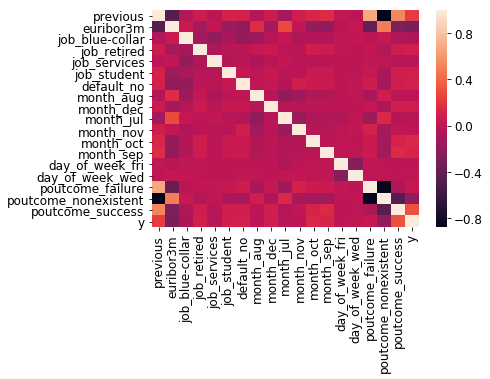

In [229]:
import seaborn as sns
corr = result_dfbankNew.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [230]:
cols=["euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success","y"] 
result_dfbankNew1=result_dfbank[cols]
result_dfbankNew1.shape

(41188, 18)

In [231]:
# result_dfbankNew1=result_dfbank[cols]
# result_dfbankNew1.shape

# Visualization of the Data

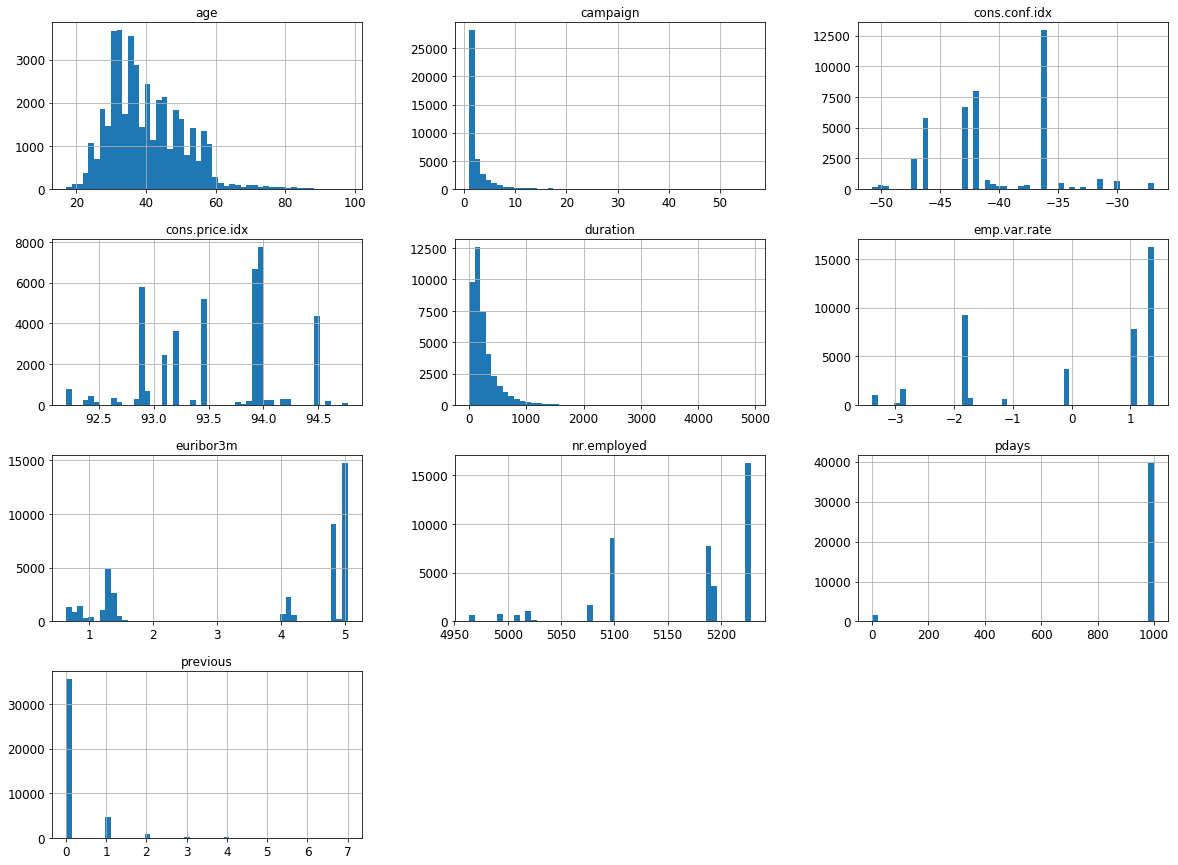

In [232]:
#histogram for continous attributes
dfbank.hist(bins=50, figsize=(20,15))
plt.show()

In [233]:
dfbank['education'].dtype

dtype('O')

job
marital
education
default
housing
loan
contact
month
day_of_week
poutcome
y


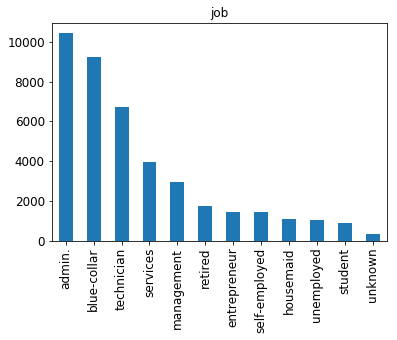

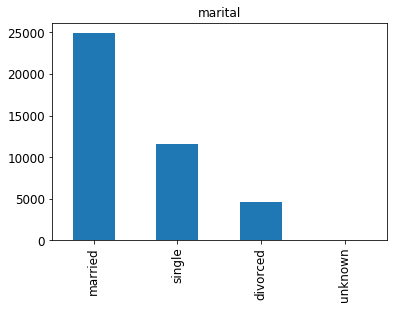

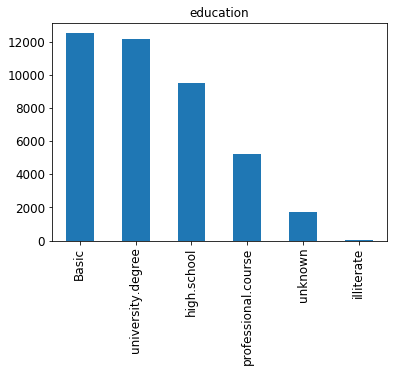

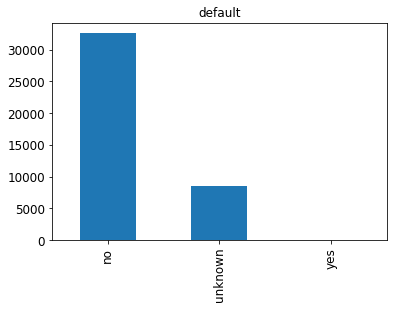

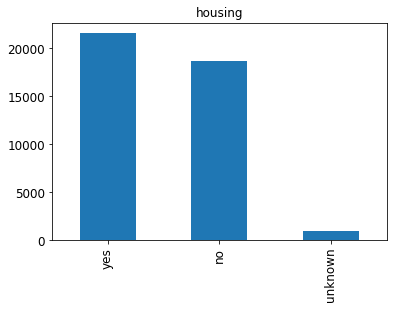

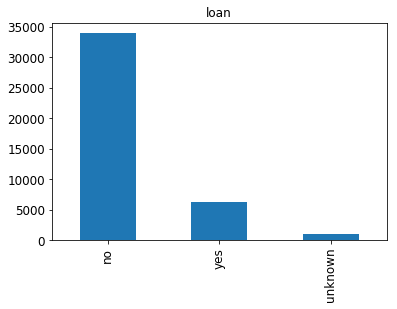

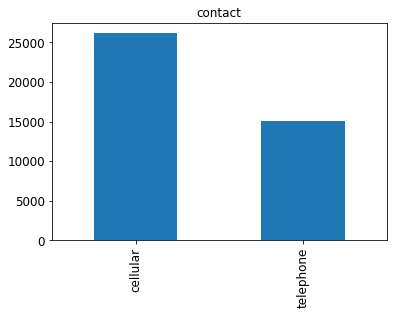

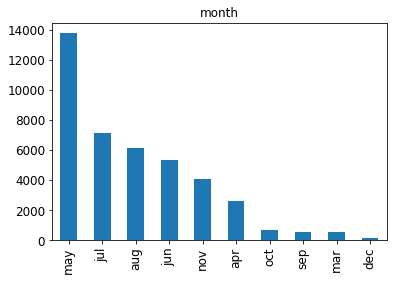

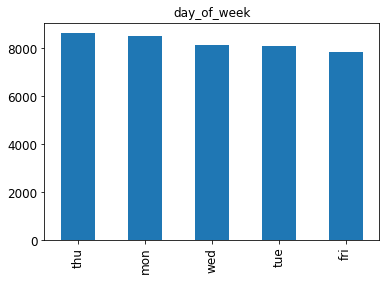

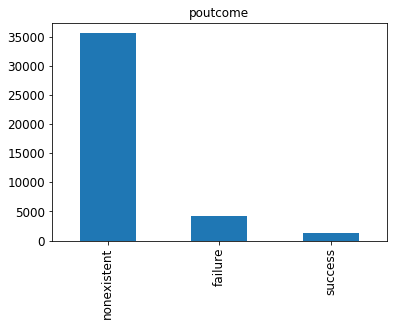

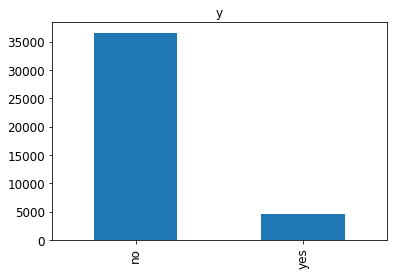

In [234]:
#bar graph for categorical variables
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in dfbank.columns:
    if dfbank[i].dtype is np.dtype('O'):
        print(i)
        plt.subplots(1,1)
        dfbank[i].value_counts().plot(kind='bar',subplots='true')
fig.tight_layout()

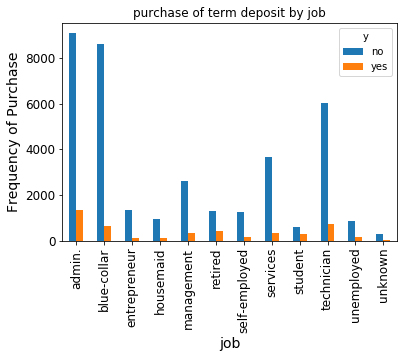

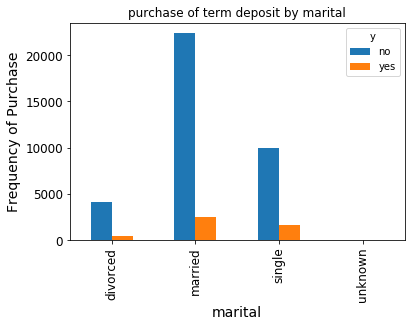

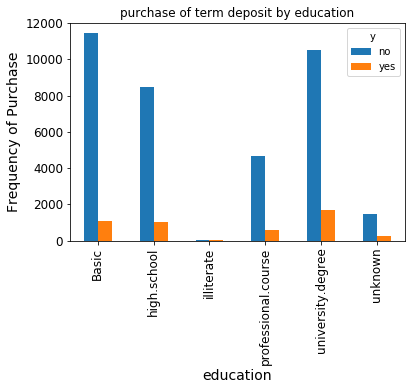

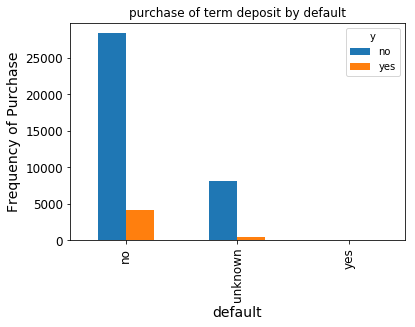

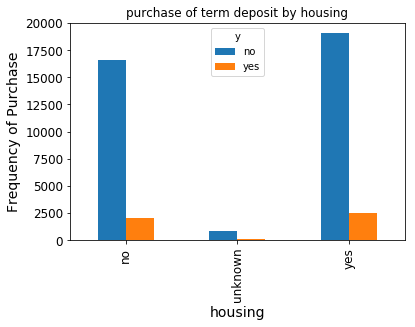

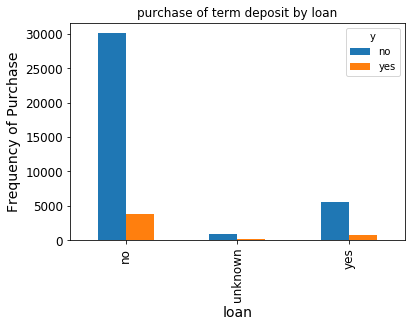

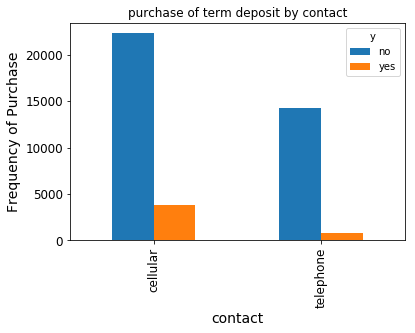

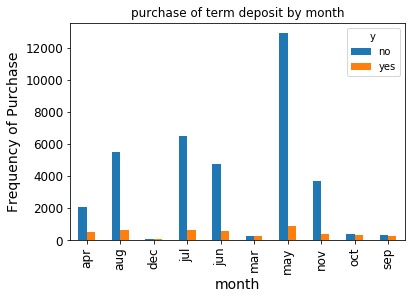

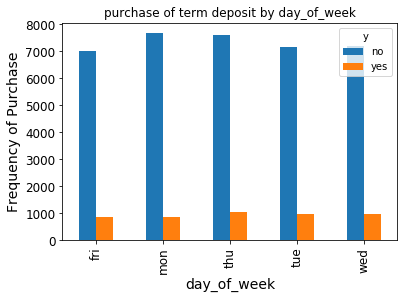

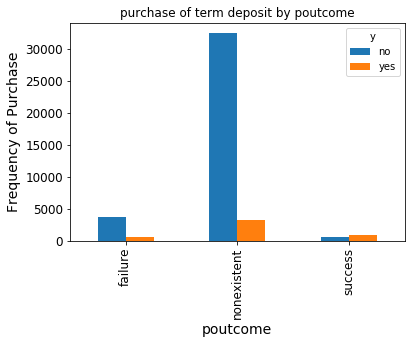

In [235]:
cols =['job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome']
for i in cols:
    pd.crosstab(dfbank[i],dfbank.y).plot(kind='bar')
    plt.title('purchase of term deposit by '+i)
    plt.xlabel(i)
    plt.ylabel('Frequency of Purchase') 

# Reading and analyzing the plots

The average age of people who buy term deposit is higher than the Avg age of people who don't buy term deposit. If the campaign (number of contacts performed during this campaign and for this client) is less than more people bought term deposit If the days (number of days that passed by after the client was last contacted from a previous campaign) are less than more people bought term deposit. From the purchase of term deposit by job graph shows the job title can be a good predictor for deciding whether one of the term deposit or not It seems the marital and education also be good predicators
for deciding whether one buys term deposit or not. But day of the week is not a predictor for deciding one who will buy term deposit or not. Month will be a good predictor. It seems all categorical variable except day of week will help us to predict the whether a user by term deposit or not

In [146]:
cols=["euribor3m", "job_blue-collar", "job_retired", "job_services", "job_student", "default_no", 
      "month_aug", "month_dec", "month_jul", "month_nov", "month_oct", "month_sep", "day_of_week_fri", "day_of_week_wed", 
      "poutcome_failure", "poutcome_nonexistent", "poutcome_success"] 
# cols=['job_blue-collar','job_retired','job_student','education_Basic','default_no','contact_cellular','month_apr','month_aug', 'month_dec','month_mar', 'month_may','month_nov','day_of_week_mon', 'poutcome_failure','poutcome_nonexistent',
#        'poutcome_success','nr.employed']
X=result_dfbankNew1[cols]
y=result_dfbankNew1['y']
X=X.values
y=y.values

In [236]:
cols=['job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_Basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_no',
       'default_unknown', 'default_yes', 'housing_no', 'housing_unknown',
       'housing_yes', 'loan_no', 'loan_unknown', 'loan_yes',
       'contact_cellular', 'contact_telephone', 'month_apr', 'month_aug',
       'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may',
       'month_nov', 'month_oct', 'month_sep', 'day_of_week_fri',
       'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_failure', 'poutcome_nonexistent',
       'poutcome_success', 'age', 'duration', 'campaign', 'pdays', 'previous',
       'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m',
       'nr.employed']
DataX=result_dfbank[cols]
Datay=result_dfbank['y']
dataX=DataX.values
datay=Datay.values

# III. Methods

In this assignment, you are build a deep network with more than 5 layers using TensorFlow. 
Looking at the chart below, get some idea about how you can construct your networks for what problem and why you pick your structure. 

- Pick at least 3 different networks for experiments.
- Summarize the choice of your networks. 
- Explain your TensorFlow codes. 
- Explain how you apply your model to your data. 

Following images are only for you to get some idea. You do not necessarily stick with these. You can come up with your own structure or shape. 

![](https://camo.githubusercontent.com/31e20172e3b7bc5530a6e7c7e7339e8e556d0acc/687474703a2f2f7777772e6173696d6f76696e737469747574652e6f72672f77702d636f6e74656e742f75706c6f6164732f323031362f30392f6e657572616c6e6574776f726b732e706e67)



Pick at least 3 different networks for experiments.
Summarize the choice of your networks.
Explain your TensorFlow codes.
Explain how you apply your model to your data.

# Explanation of 3 structure

For the classification problem I chose Deep feed forward, Deep Convolutional Network and Auto Encoder


# 1. Deep Feed forward

Deep feed forward is one of the simplest neural network architecture and it is a extension of what we did in assignment 4.
In Deep feed forward the number of hidden layer is more than one .In this assigment I have more than 5 hidden layers.
here we have 6 hidden layer and one output layer.

Reason why I am choosing Deep Feed forward is becuase its the base of other architecutre. For CNN and AE also I am using Deep Feed forward. In CNN the output from Convolutional layer is feeded to deep feed forward and in Auto  Encoder I am using Deep forward along with Auto Enocder for doing the classification problem.

# 2. Convolutional Neural Network Architecture

Below is the basic idea of CNN and its architecture.

In 1980s, from the study of the brain's visual cortex, the CNN model is first proposed. As computing power and data for training grows, CNNs is now capable of achieving sucessful performance including visual perception, voice recognition, natural language processing, and others. 

Localizing the perceptions, the *convolutional layer* maps the local receptive fields into one hidden node. Once inputs are mapped to hidden units in the first convolutional layer, the first layer is mapped in the same way with local receptive fields to the next convolutional layer.

![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/CNN.png)

To build a convolutional layer to have the same width and height, we can adding *zero padding* around the original image. 

![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/CNN_padding.png)

To reduce the size of the layer, we can increase the *stride* to space out the receptive fields. 
![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/CNN_stride.png)

# CNN Architecture

Figure 13-9 shows the typical CNN archiecture that has a few convolutional layers and poolin layers alternatively connected, which are followed by fully connected layers. 
The image input gets smaller as the network goes deeper. 

![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/CNN_arch.png)

# Filters

Each receptive field are mapped to a real value after applying some weights. There are two possible sets of weights, called *filters* or *convoluution kernels*. 
Simple filters as follows are hightlights an area that is similar to the filter pattern. 
Combining multiple filtered neurons, it learns to combine them into complex patterns. 

# Pooling

To reduuce the computational load, memory usage, and the number of parameters, we use pooling layer (ie. max pooling). 
Without having weights in filters, pooling simply aggregates the values in the receptive field by using max or mean operation.

![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/CNN_maxpool.png)

# DCN- Choice

Here I am using CNN because this is one of the popular architecture used for neural network. The each neurons will focus on 
particular receptive fields. So that we can have better understanding of the  input. Convolutional layers will reduce the input size and it will capture even the small features also. After doing pooling we are feedig it to a deep feed forward neural network and we are classifying the result

# 3. Auto Encoder

Auto-encoders are the framework for learning features with neural network bottelneck structure. The model redudes the number of features in an unsupervised way. 
Previously, encoding/decoding or dimensionality reduction was investigated in variouus ways.
Autoencoders, however, simply copy the input to their outputs for the codings. 

![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/linear_AE.png)

# Building a Classifier with Encoder

Now, we can reuse the upper part of the autoencoder, the encoder, to another deep networks for nonlinear classification or logistic regression. 
For this, we do not need to relearn from scratch. 

![](http://webpages.uncc.edu/mlee173/teach/itcs6156/images/class/AE_classify.png)

# AutoEncoder- Choice

I am using the Auto Encoder because it is useful for compressing the input (encoding). After encoding we are feeding the ecnoded
output to the fully connected neural network. But we have to do the training for Auto Encoder first . Once the loss is reduced
then we can feed the encoded input to fully connected neural network. In my dataset the number of features are high and if I can
can encode the input then it will be easy.

In [237]:
# preparation

import tensorflow as tf
# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
def reset_graph(seed=42):
    tf.reset_default_graph()
    tf.set_random_seed(seed)
    np.random.seed(seed)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import IPython.display as ipd  # for display and clear_output

In [238]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = b"<stripped %d bytes>"%size
    return strip_def

def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))

    iframe = """
        <iframe seamless style="width:1200px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [239]:
def selu(z,
         scale=1.0507009873554804934193349852946,
         alpha=1.6732632423543772848170429916717):
    return scale * tf.where(z >= 0.0, z, alpha * tf.nn.elu(z))



 # Explanation of Codes

# 1. DEEP FEED FORWARD 

Following is the Deep feed forward network code.  First thing I am doing is the setting up of the neural network.
Here I am using 7 layers including the output layer. My dataset has 61 input features so n_outputs is 61 . For each hidden layer I am using 100 neurons. the number of output is 2 since mine is a binary classification problem.
X and y are the placeholder for storing input data and target labels.

I have 7 neural network layers and except the last layer I am using the selu as the ativation function. I am taking the softmax of output from output layer.

During training, the model will try to reduce the loss by calculating cross entropy loss function.
Every layer except the output layer, I am using selu as the activation function.

Also I am calculating the accuracy based on the logits output from output layer and original target label.

In [348]:
reset_graph()

n_inputs = 61
n_hidden1 = 100
n_hidden2 = 100
n_hidden3= 100
n_hidden4=100
n_hidden5=100
n_hidden6=100

n_outputs = 2

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=selu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=selu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=selu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=selu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=selu, name="hidden5")
    hidden6 = tf.layers.dense(hidden5, n_hidden6, activation=selu, name="hidden6")
    logits = tf.layers.dense(hidden6, n_outputs, name="outputs")

   # hidden1 = tf.contrib.layers.fully_connected(X, n_hidden1,activation_fn=selu, scope="hidden1")
   # hidden2 = tf.contrib.layers.fully_connected(hidden1, n_hidden2,activation_fn=selu,  scope="hidden2")
   # hidden3 = tf.contrib.layers.fully_connected(hidden2, n_hidden3,activation_fn=selu,  scope="hidden3")
   # hidden4 = tf.contrib.layers.fully_connected(hidden3, n_hidden4,activation_fn=selu,  scope="hidden4")
   # hidden5 = tf.contrib.layers.fully_connected(hidden4, n_hidden5, activation_fn=selu, scope="hidden5")
   # hidden6 = tf.contrib.layers.fully_connected(hidden5, n_hidden6, activation_fn=selu, scope="hidden6")
    #logits = tf.contrib.layers.fully_connected(hidden6, n_outputs, scope="outputs",activation_fn=None)
    softmaxOP=tf.nn.softmax(logits)
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()


In [306]:
datay[datay==-1]=0

In [307]:
dataX

array([[-0.58202282, -0.53831699, -0.19143021, ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.58202282, -0.53831699, -0.19143021, ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.58202282, -0.53831699, -0.19143021, ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [-0.58202282, -0.53831699, -0.19143021, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [-0.58202282, -0.53831699, -0.19143021, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [-0.58202282, -0.53831699, -0.19143021, ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [308]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
dataX=scaler.fit_transform(dataX)
dataX

array([[-0.58202282, -0.53831699, -0.19143021, ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.58202282, -0.53831699, -0.19143021, ...,  0.88644656,
         0.71245988,  0.33167991],
       [-0.58202282, -0.53831699, -0.19143021, ...,  0.88644656,
         0.71245988,  0.33167991],
       ...,
       [-0.58202282, -0.53831699, -0.19143021, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [-0.58202282, -0.53831699, -0.19143021, ..., -2.22495344,
        -1.49518647, -2.8156966 ],
       [-0.58202282, -0.53831699, -0.19143021, ..., -2.22495344,
        -1.49518647, -2.8156966 ]])

In [309]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataX,datay, test_size=0.2, random_state=0)

In [310]:
def partition(dataX,datay):
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(dataX,datay, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

Here I am traning and testing the deep feed neural network as batches. I wrote a function to get batches on input data based on the
batch index. This method will be called from traning and it will return the train batch and target batch.

In [311]:
def get_batches(i,dataX,datay):
    size = dataX.shape[0]
    start = (int)(size/4)*i
    end = (int)(size/4)*(i+1)
    print("start","end" , start, end)
    #X_train, X_test, y_train, y_test= partition(dataX[start:end,],datay[start:end,])
    #return X_train, X_test, y_train, y_test
    return dataX[start:end],datay[start:end]

Here I am training the deep feed forward network using batches. It will evaluate the training_op and it will train the neural network defined using tensorflow. No of epoch I used here is 25 and batch size is 4. For each epoch, I am calcualting the train accuracy and the test accuracy. At the end I am getting the predicted result for test dataset. Since the output is in logit , I am calcuating the softmax and take the maximum in a row.

In [312]:
with tf.Session() as sess:
    init.run()
    for epoch in range(25):
        for i in range(4):
            X_train, y_train=get_batches(i,dataX,datay)
            sess.run(training_op, feed_dict={X: X_train, y: y_train})
            acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("epoch",epoch,"train accuracy",acc_train,"test acc=",acc_test,"batch",i)
    softmax=softmaxOP.eval(feed_dict={X: X_test, y: y_test})
    print(softmax.shape)  
    predicteddff=np.argmax(softmax,axis=1) 
    print(np.unique(predicteddff))

start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 0 train accuracy 0.6987472 test acc= 0.7487254 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 1 train accuracy 0.7431291 test acc= 0.83964556 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 2 train accuracy 0.7557541 test acc= 0.86926436 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 3 train accuracy 0.7626493 test acc= 0.880068 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 4 train accuracy 0.7668253 test acc= 0.8878369 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 5 train accuracy 0.769933 test acc= 0.89208543 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 6 train accuracy 0.7738176 test acc= 0.

In [313]:
np.unique(y_test)

array([0, 1], dtype=int64)

In [314]:
np.sum(y_test==0)

7319

Here I am plotting the result for the Deep feed forward 

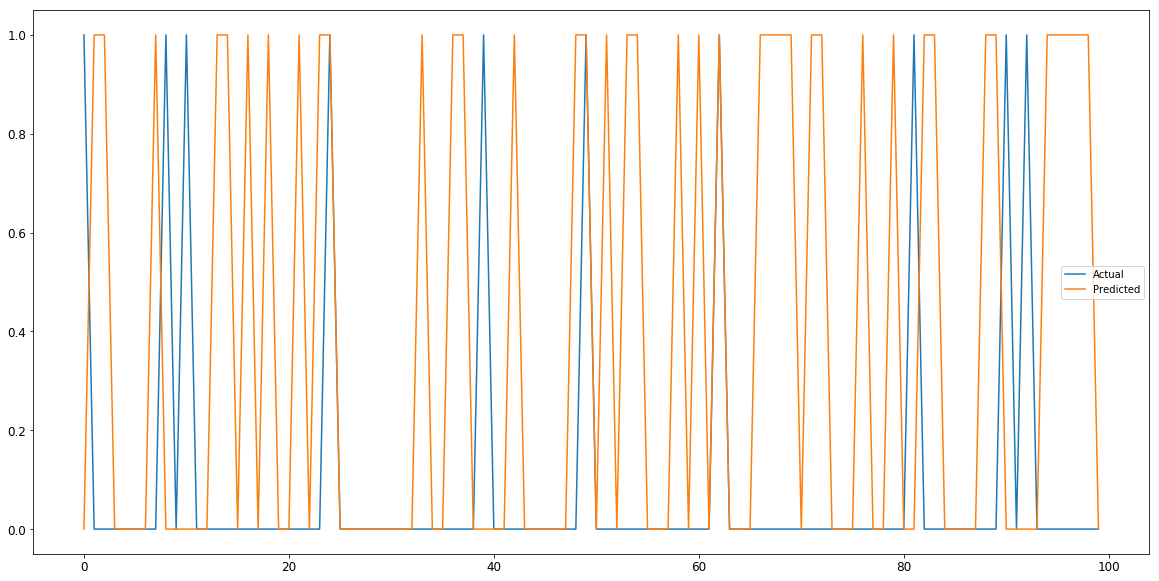

In [315]:
with tf.Session() as sess:
    init.run()
    
   # errorTrace = []
   # for epoch in range(n_epochs):
    #    if epoch % 100 == 0:
           # print("Epoch", epoch, "MSE =", mse.eval({X: Xtrain, T: Ttrain}))

          #  plt.clf()
           ## plt.plot(errorTrace[:epoch])
           # plt.ylim(0,0.7)
          #  plt.xlabel('Epochs')
           # plt.ylabel('RMSE')
           # plt.legend(('Train','Test'),loc='upper left')
    softmax=softmaxOP.eval(feed_dict={X: X_test, y: y_test})   
    softmax=np.argmax(softmax,axis=1)
           # plt.subplot(3,1,2)
            #plt.plot(X_train,y_train,'o-',X_test,y_test,'o-',X_test,softmax,'o-')
           # plt.xlim(-10,10)
           ## plt.legend(('Training','Testing','Model'),loc='upper left')
           # plt.xlabel('$x$')
           # plt.ylabel('Actual and Predicted $f(x)$')


           # plt.tight_layout()
           # ipd.clear_output(wait=True)
           # ipd.display(fig)
    plt.figure(figsize=(20, 10))
    plt.plot(y_test[:100], label='Actual')
    plt.plot(softmax[:100], label='Predicted')
    plt.legend()
    plt.show()
            
        #err, _ = sess.run([mse, training_op], {X: Xtrain, T: Ttrain})
        #errorTrace.append(err)
    

    #print("Train MSE: ", mse.eval({X: Xtrain, T: Ttrain}))
    #print("Test MSE: ", mse.eval({X: Xtest, T: Ttest}))
ipd.clear_output(wait=True)

# DCN (Deep Convolutional Network)

For the below code first part is the setting up of the deep convolutional network.  Here I am using two convolutional layers , 5 hidden layer and one output layer. Since my input has 61 features I am defining the height as 61.

For the convolutional layer I am using the no of feature maps as 1, kernel size as 3, stride as 1 and padding as "SAME".
X and y are the place holders for the input data and target labels. Before feeding to convolutiona layer I am reshaping the input to 1D. The output from convolutional layer is given to a 5 layer fully connected neural network.

Hidden layer I am using 31 neurons as the input and activation function as selu. logit output from the output layer I am converting to softmax .

during traning the model will try to reduce the cross entropy loss. Accuracy is caluclated by comparing the predicted result and target labels.

In [374]:
height = 61
width = 1
channels = 1
n_inputs = height * width
# first convolution layer params
conv1_fmaps = 1
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"
# Second convolution layer params
conv2_fmaps = 1
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"
n_fc1 = 14
n_outputs = 2

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv1d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv1d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("fc1"):
    _fc1 = tf.reshape(conv2, shape=[-1, 31])
    fc1 = tf.layers.dense(_fc1, 31, activation=tf.nn.selu, name="fc1")
    
with tf.name_scope("fc2"):
    fc2 = tf.layers.dense(fc1, 31, activation=tf.nn.selu, name="fc2")

with tf.name_scope("fc3"):
    fc3 = tf.layers.dense(fc2, 31, activation=tf.nn.selu, name="fc3")

with tf.name_scope("fc4"):
    fc4 = tf.layers.dense(fc3, 31, activation=tf.nn.selu, name="fc4")

with tf.name_scope("fc5"):
    fc5 = tf.layers.dense(fc4, 31, activation=tf.nn.selu, name="fc5")

with tf.name_scope("output"):
    logits = tf.squeeze(tf.layers.dense(fc5, n_outputs, name="output"))
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
    optimizer = tf.train.AdamOptimizer()
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [317]:
print(conv2)
print(conv1)
print(fc1)

Tensor("conv2/Relu:0", shape=(?, 31, 1), dtype=float32)
Tensor("conv1/Relu:0", shape=(?, 61, 1), dtype=float32)
Tensor("fc1/fc1/Selu:0", shape=(?, 31), dtype=float32)


In [318]:
print(conv2.shape)

(?, 31, 1)


Following the code  which use the DCN network defined above. For each epoch , it will train the model by evaluating the training_op 
and train and test accuracy also will be calculated.  At the end of the training I am getting the predicted result based on the 
test data. It is a softmax output.

In [375]:
n_epochs = 29
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    ydcn= Y_proba.eval(feed_dict={X: X_test, y: y_test})
    ydcn=np.argmax(ydcn,axis=1)

0 Train accuracy: 0.43478683 Test accuracy: 0.4476815
1 Train accuracy: 0.5179178 Test accuracy: 0.60548675
2 Train accuracy: 0.6403807 Test accuracy: 0.772032
3 Train accuracy: 0.7134117 Test accuracy: 0.8574897
4 Train accuracy: 0.73623383 Test accuracy: 0.8810391
5 Train accuracy: 0.74050695 Test accuracy: 0.88589466
6 Train accuracy: 0.7408954 Test accuracy: 0.88686574
7 Train accuracy: 0.74118674 Test accuracy: 0.8873513
8 Train accuracy: 0.74108964 Test accuracy: 0.88698715
9 Train accuracy: 0.7414781 Test accuracy: 0.8871085
10 Train accuracy: 0.7407983 Test accuracy: 0.8863802
11 Train accuracy: 0.7407983 Test accuracy: 0.88455933
12 Train accuracy: 0.74108964 Test accuracy: 0.87909687
13 Train accuracy: 0.7426435 Test accuracy: 0.86962855
14 Train accuracy: 0.7440031 Test accuracy: 0.8572469
15 Train accuracy: 0.7396329 Test accuracy: 0.84583634
16 Train accuracy: 0.73817617 Test accuracy: 0.8360039
17 Train accuracy: 0.7385646 Test accuracy: 0.8327264
18 Train accuracy: 0.741

Following is the code for plotting predicted and actual values.

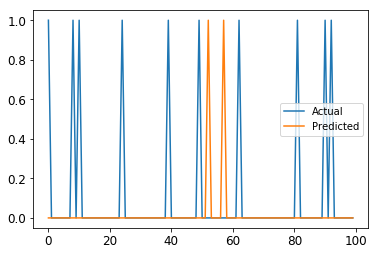

In [376]:
plt.plot(y_test[:100], label='Actual')
plt.plot(ydcn[:100], label='Predicted')
plt.legend()
plt.show()
    

# Auto Encoder

Below is the code for doing classification using AutoEncoderand neural network. Here what I am doing is first I will train the autoencode untill it give a less reconstruction loss. ie, the input is same as output. Once it become stable. I will feed the encoded ouput to fully connected neural network as the input. For autoencoder I have an input layer with 300 neurons, second layer with 150 neuron and third layer with neurons same as input layer.  I have placeholder X and y for inout data and target label. For the autoencoders I am using relu as the activation function.
For autoencoder training, it will try to reduce the reconstruction_loss.

I am creating a 7 layer neural network with 100 neurons in each layer. Here I am using selu as the actication function.
training of the neural network with input from autoencoder will try to reduce the cross entroy loss function. logit from the ouput layer is converted into softmax output also.


In [337]:
reset_graph()

from functools import partial

n_inputs = 61
n_hidden1 = 300
n_hidden2 = 150  # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs
n_fc1 = 100
_outputs = 2
learning_rate = 0.01
l2_reg = 0.0001

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
y = tf.placeholder(tf.int64, shape=[None])
he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
#Equivalent to:
#he_init = lambda shape, dtype=tf.float32: tf.truncated_normal(shape, 0., stddev=np.sqrt(2/shape[0]))
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense,
                         activation=tf.nn.elu,
                         kernel_initializer=he_init,
                         kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)
outputs = my_dense_layer(hidden3, n_outputs, activation=None)


#NN layers

NNhidden1 = tf.contrib.layers.fully_connected(hidden2, 100, scope="hidden1")
NNhidden2 = tf.contrib.layers.fully_connected(NNhidden1, 100,  scope="hidden2")
NNhidden3 = tf.contrib.layers.fully_connected(NNhidden2, 100,  scope="hidden3")
NNhidden4 = tf.contrib.layers.fully_connected(NNhidden3, 100,  scope="hidden4")
NNhidden5 = tf.contrib.layers.fully_connected(NNhidden4, 100,  scope="hidden5")
NNhidden6 = tf.contrib.layers.fully_connected(NNhidden5, 100,  scope="hidden6")
logits = tf.contrib.layers.fully_connected(NNhidden6, n_outputs, scope="outputs",activation_fn=None)
softmax_output = tf.nn.softmax(logits)
loss_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
actual_loss = tf.reduce_mean(loss_xentropy, name="loss")

actual_optimizer = tf.train.AdamOptimizer(learning_rate)
actual_training_op = actual_optimizer.minimize(actual_loss)


reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

optimizer = tf.train.AdamOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver() # not shown in the book

Below is the training for the autoencoder and I am printing the loss in each epoch. Once the training is done I am saving the session as ./my_model_all_layers.ckpt and it will be used for neural network training.

In [323]:
n_epochs = 50
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: X_train})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_train})   # not shown
        print("\r{}".format(epoch), "Train MSE:", loss_train)           # not shown
    saver.save(sess, "./my_model_all_layers.ckpt")                  # not shown

0 Train MSE: 4.760132
1 Train MSE: 2.8696299
2 Train MSE: 1.6215591
3 Train MSE: 1.3208083
4 Train MSE: 1.2111281
5 Train MSE: 0.96552134
6 Train MSE: 0.8531138
7 Train MSE: 0.79339343
8 Train MSE: 0.7357064
9 Train MSE: 0.6607734
10 Train MSE: 0.58580387
11 Train MSE: 0.5401548
12 Train MSE: 0.5075688
13 Train MSE: 0.47678453
14 Train MSE: 0.4494683
15 Train MSE: 0.4239037
16 Train MSE: 0.3948082
17 Train MSE: 0.36511245
18 Train MSE: 0.34250885
19 Train MSE: 0.3230952
20 Train MSE: 0.31147766
21 Train MSE: 0.29921606
22 Train MSE: 0.27875176
23 Train MSE: 0.25784245
24 Train MSE: 0.24240749
25 Train MSE: 0.23278704
26 Train MSE: 0.2242624
27 Train MSE: 0.2154927
28 Train MSE: 0.20330887
29 Train MSE: 0.19057743
30 Train MSE: 0.18108283
31 Train MSE: 0.17471012
32 Train MSE: 0.16909052
33 Train MSE: 0.16145496
34 Train MSE: 0.1535818
35 Train MSE: 0.14692415
36 Train MSE: 0.14218898
37 Train MSE: 0.13783537
38 Train MSE: 0.13258134
39 Train MSE: 0.12622127
40 Train MSE: 0.12133373
41 

Below is the code for neural network training. It will first load the saved session from the autoencoder training. It will train the neural network which get input from the autoencoder  by evaluating the actual_training_op.  For each epoch I am calculating the loss for training and validation. At the end I am predicting the classification result for test data and Acccuracy will be calucated in the below codes.

In [331]:
n_epochs = 40
with tf.Session() as sess:
    init.run()
    saver.restore(sess, "./my_model_all_layers.ckpt")
    for epoch in range(n_epochs):
        sess.run(actual_training_op, feed_dict={X: X_train, y: y_train})    
        acc_train = actual_loss.eval(feed_dict={X: X_train, y: y_train})
        #X_val_scaled = (mnist.validation.images - means) / stds
        acc_test = actual_loss.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Batch train loss:", acc_train, "Validation loss:", acc_test)
    predictedAE = sess.run(softmax_output, feed_dict={X: X_test, y: y_test})
    

INFO:tensorflow:Restoring parameters from ./my_model_all_layers.ckpt
0 Batch train loss: 1.4505194 Validation loss: 1.7530488
1 Batch train loss: 5.481609 Validation loss: 1.9158101
2 Batch train loss: 0.6800601 Validation loss: 0.43362394
3 Batch train loss: 2.3160636 Validation loss: 2.2035744
4 Batch train loss: 1.479785 Validation loss: 1.6462007
5 Batch train loss: 1.5274072 Validation loss: 1.5445269
6 Batch train loss: 1.0419234 Validation loss: 1.160316
7 Batch train loss: 0.81887484 Validation loss: 0.7616715
8 Batch train loss: 0.6251412 Validation loss: 0.6078972
9 Batch train loss: 0.5276058 Validation loss: 0.5710599
10 Batch train loss: 0.4855144 Validation loss: 0.491125
11 Batch train loss: 0.4739666 Validation loss: 0.50627166
12 Batch train loss: 0.5607448 Validation loss: 0.42716694
13 Batch train loss: 0.6089432 Validation loss: 0.5656308
14 Batch train loss: 0.48447573 Validation loss: 0.4010635
15 Batch train loss: 0.48747617 Validation loss: 0.39039865
16 Batch t

Below is the accuracy of the classification model defined using Autoencoder and neural network 

In [332]:
#accuracy
np.sum(y_test == np.argmax(predictedAE, 1)) / len(y_test)

0.8442583151250304

In [333]:
predictedAE= np.argmax(predictedAE, 1)

Following is the graph showing actual and predicted outputs for autoencoder

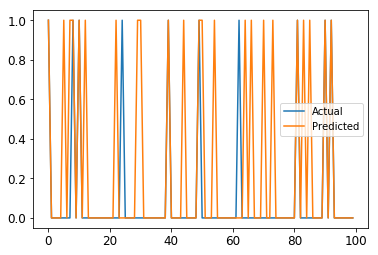

In [334]:
plt.plot(y_test[:100], label='Actual')
plt.plot(predictedAE[:100], label='Predicted')
plt.legend()
plt.show()

# Explanation of experimental codes

# Deep feed forward

I am experimenting by changing the optimizer in training, changing learning rate and no of neurons

In [386]:
reset_graph()

n_inputs = 61
n_hidden1 = 100
n_hidden2 = 100
n_hidden3= 100
n_hidden4=100
n_hidden5=100
n_hidden6=100

n_outputs = 2

X = tf.placeholder(tf.float32, shape=(None, n_inputs), name="X")
y = tf.placeholder(tf.int64, shape=(None), name="y")

with tf.name_scope("dnn"):
    hidden1 = tf.layers.dense(X, n_hidden1, activation=selu, name="hidden1")
    hidden2 = tf.layers.dense(hidden1, n_hidden2, activation=selu, name="hidden2")
    hidden3 = tf.layers.dense(hidden2, n_hidden3, activation=selu, name="hidden3")
    hidden4 = tf.layers.dense(hidden3, n_hidden4, activation=selu, name="hidden4")
    hidden5 = tf.layers.dense(hidden4, n_hidden5, activation=selu, name="hidden5")
    hidden6 = tf.layers.dense(hidden5, n_hidden6, activation=selu, name="hidden6")
    logits = tf.layers.dense(hidden6, n_outputs, name="outputs")

   # hidden1 = tf.contrib.layers.fully_connected(X, n_hidden1,activation_fn=selu, scope="hidden1")
   # hidden2 = tf.contrib.layers.fully_connected(hidden1, n_hidden2,activation_fn=selu,  scope="hidden2")
   # hidden3 = tf.contrib.layers.fully_connected(hidden2, n_hidden3,activation_fn=selu,  scope="hidden3")
   # hidden4 = tf.contrib.layers.fully_connected(hidden3, n_hidden4,activation_fn=selu,  scope="hidden4")
   # hidden5 = tf.contrib.layers.fully_connected(hidden4, n_hidden5, activation_fn=selu, scope="hidden5")
   # hidden6 = tf.contrib.layers.fully_connected(hidden5, n_hidden6, activation_fn=selu, scope="hidden6")
    #logits = tf.contrib.layers.fully_connected(hidden6, n_outputs, scope="outputs",activation_fn=None)
    softmaxOP=tf.nn.softmax(logits)
with tf.name_scope("loss"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
    loss = tf.reduce_mean(xentropy, name="loss")

learning_rate = 0.01

with tf.name_scope("train"):
    #optimizer = tf.train.GradientDescentOptimizer(learning_rate)
    optimizer = tf.train.AdamOptimizer(learning_rate)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

init = tf.global_variables_initializer()
saver = tf.train.Saver()


In [387]:
with tf.Session() as sess:
    init.run()
    for epoch in range(25):
        for i in range(4):
            X_train, y_train=get_batches(i,dataX,datay)
            sess.run(training_op, feed_dict={X: X_train, y: y_train})
            acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print("epoch",epoch,"train accuracy",acc_train,"test acc=",acc_test,"batch",i)
    softmax=softmaxOP.eval(feed_dict={X: X_test, y: y_test})
    print(softmax.shape)  
    predicteddff=np.argmax(softmax,axis=1) 
    print(np.unique(predicteddff))

start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 0 train accuracy 0.71632516 test acc= 0.377883 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 1 train accuracy 0.7525493 test acc= 0.8143967 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 2 train accuracy 0.72963 test acc= 0.88018936 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 3 train accuracy 0.72438574 test acc= 0.849478 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 4 train accuracy 0.62814415 test acc= 0.8197378 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 5 train accuracy 0.74225503 test acc= 0.880068 batch 3
start end 0 10297
start end 10297 20594
start end 20594 30891
start end 30891 41188
epoch 6 train accuracy 0.76779646 test acc= 0.

In [389]:
np.sum(y_test == predicteddff) / len(y_test)

0.9163631949502307

Using AdamOptimizer for training gives me better result for  deep feed forward, If I reduce learning rate it is taking lot of time to give good results and Increasing the no of 

# Deep convolutional network

In [398]:
height = 61
width = 1
channels = 1
n_inputs = height * width
# first convolution layer params
conv1_fmaps = 1
conv1_ksize = 3
conv1_stride = 1
conv1_pad = "SAME"
# Second convolution layer params
conv2_fmaps = 1
conv2_ksize = 3
conv2_stride = 2
conv2_pad = "SAME"
n_fc1 = 14
n_outputs = 2

reset_graph()

with tf.name_scope("inputs"):
    X = tf.placeholder(tf.float32, shape=[None, n_inputs], name="X")
    X_reshaped = tf.reshape(X, shape=[-1, height, width])
    y = tf.placeholder(tf.int32, shape=[None], name="y")

conv1 = tf.layers.conv1d(X_reshaped, filters=conv1_fmaps, kernel_size=conv1_ksize,
                         strides=conv1_stride, padding=conv1_pad,
                         activation=tf.nn.relu, name="conv1")
conv2 = tf.layers.conv1d(conv1, filters=conv2_fmaps, kernel_size=conv2_ksize,
                         strides=conv2_stride, padding=conv2_pad,
                         activation=tf.nn.relu, name="conv2")

with tf.name_scope("fc1"):
    _fc1 = tf.reshape(conv2, shape=[-1, 31])
    fc1 = tf.layers.dense(_fc1, 31, activation=tf.nn.selu, name="fc1")
    
with tf.name_scope("fc2"):
    fc2 = tf.layers.dense(fc1, 31, activation=tf.nn.selu, name="fc2")

with tf.name_scope("fc3"):
    fc3 = tf.layers.dense(fc2, 31, activation=tf.nn.selu, name="fc3")

with tf.name_scope("fc4"):
    fc4 = tf.layers.dense(fc3, 31, activation=tf.nn.selu, name="fc4")

with tf.name_scope("fc5"):
    fc5 = tf.layers.dense(fc4, 31, activation=tf.nn.selu, name="fc5")

with tf.name_scope("output"):
    logits = tf.squeeze(tf.layers.dense(fc5, n_outputs, name="output"))
    Y_proba = tf.nn.softmax(logits, name="Y_proba")

with tf.name_scope("train"):
    xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y)
    loss = tf.reduce_mean(xentropy)
   # optimizer = tf.train.AdamOptimizer()
    optimizer = tf.train.AdagradOptimizer(0.01)
    training_op = optimizer.minimize(loss)

with tf.name_scope("eval"):
    correct = tf.nn.in_top_k(logits, y, 1)
    accuracy = tf.reduce_mean(tf.cast(correct, tf.float32))

with tf.name_scope("init_and_save"):
    init = tf.global_variables_initializer()
    saver = tf.train.Saver()

In [399]:
n_epochs = 29
batch_size = 100

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: X_train, y: y_train})
        acc_train = accuracy.eval(feed_dict={X: X_train, y: y_train})
        acc_test = accuracy.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Train accuracy:", acc_train, "Test accuracy:", acc_test)
    ydcn= Y_proba.eval(feed_dict={X: X_test, y: y_test})
    ydcn=np.argmax(ydcn,axis=1)

0 Train accuracy: 0.62717295 Test accuracy: 0.74848264
1 Train accuracy: 0.69136643 Test accuracy: 0.82981306
2 Train accuracy: 0.7099155 Test accuracy: 0.8506919
3 Train accuracy: 0.7239973 Test accuracy: 0.86016023
4 Train accuracy: 0.7319608 Test accuracy: 0.86744356
5 Train accuracy: 0.73603964 Test accuracy: 0.8701141
6 Train accuracy: 0.73875886 Test accuracy: 0.87266326
7 Train accuracy: 0.73875886 Test accuracy: 0.87533385
8 Train accuracy: 0.73934156 Test accuracy: 0.87897545
9 Train accuracy: 0.74002135 Test accuracy: 0.88055354
10 Train accuracy: 0.7391473 Test accuracy: 0.8815246
11 Train accuracy: 0.73934156 Test accuracy: 0.8815246
12 Train accuracy: 0.7396329 Test accuracy: 0.8821316
13 Train accuracy: 0.7395358 Test accuracy: 0.88249576
14 Train accuracy: 0.73992425 Test accuracy: 0.8826171
15 Train accuracy: 0.7407012 Test accuracy: 0.88237435
16 Train accuracy: 0.74167234 Test accuracy: 0.88237435
17 Train accuracy: 0.74040985 Test accuracy: 0.88237435
18 Train accura

changing the optimizer improved the accuracy.

# Auto Encoder

In [402]:
reset_graph()

from functools import partial

n_inputs = 61
n_hidden1 = 300
n_hidden2 = 150  # codings
n_hidden3 = n_hidden1
n_outputs = n_inputs
n_fc1 = 100
_outputs = 2
learning_rate = 0.01
l2_reg = 0.0001

X = tf.placeholder(tf.float32, shape=[None, n_inputs])
y = tf.placeholder(tf.int64, shape=[None])
he_init = tf.contrib.layers.variance_scaling_initializer() # He initialization
#Equivalent to:
#he_init = lambda shape, dtype=tf.float32: tf.truncated_normal(shape, 0., stddev=np.sqrt(2/shape[0]))
l2_regularizer = tf.contrib.layers.l2_regularizer(l2_reg)
my_dense_layer = partial(tf.layers.dense,
                         activation=tf.nn.elu,
                         kernel_initializer=he_init,
                         kernel_regularizer=l2_regularizer)

hidden1 = my_dense_layer(X, n_hidden1)
hidden2 = my_dense_layer(hidden1, n_hidden2)
hidden3 = my_dense_layer(hidden2, n_hidden3)
outputs = my_dense_layer(hidden3, n_outputs, activation=None)


#NN layers

NNhidden1 = tf.contrib.layers.fully_connected(hidden2, 100, scope="hidden1")
NNhidden2 = tf.contrib.layers.fully_connected(NNhidden1, 100,  scope="hidden2")
NNhidden3 = tf.contrib.layers.fully_connected(NNhidden2, 100,  scope="hidden3")
NNhidden4 = tf.contrib.layers.fully_connected(NNhidden3, 100,  scope="hidden4")
NNhidden5 = tf.contrib.layers.fully_connected(NNhidden4, 100,  scope="hidden5")
NNhidden6 = tf.contrib.layers.fully_connected(NNhidden5, 100,  scope="hidden6")
logits = tf.contrib.layers.fully_connected(NNhidden6, n_outputs, scope="outputs",activation_fn=None)
softmax_output = tf.nn.softmax(logits)
loss_xentropy = tf.nn.sparse_softmax_cross_entropy_with_logits(labels=y, logits=logits)
actual_loss = tf.reduce_mean(loss_xentropy, name="loss")

actual_optimizer = tf.train.AdagradOptimizer(learning_rate)
actual_training_op = actual_optimizer.minimize(actual_loss)


reconstruction_loss = tf.reduce_mean(tf.square(outputs - X))

reg_losses = tf.get_collection(tf.GraphKeys.REGULARIZATION_LOSSES)
loss = tf.add_n([reconstruction_loss] + reg_losses)

optimizer = tf.train.AdagradOptimizer(learning_rate)
training_op = optimizer.minimize(loss)

init = tf.global_variables_initializer()
saver = tf.train.Saver() # not shown in the book

In [403]:
n_epochs = 50
batch_size = 150

with tf.Session() as sess:
    init.run()
    for epoch in range(n_epochs):
        sess.run(training_op, feed_dict={X: X_train})
        loss_train = reconstruction_loss.eval(feed_dict={X: X_train})   # not shown
        print("\r{}".format(epoch), "Train MSE:", loss_train)           # not shown
    saver.save(sess, "./my_model_all_layers.ckpt")                  # not shown

0 Train MSE: 3.9214876
1 Train MSE: 3.4090357
2 Train MSE: 3.080001
3 Train MSE: 2.8363287
4 Train MSE: 2.642942
5 Train MSE: 2.4830425
6 Train MSE: 2.3472042
7 Train MSE: 2.2295525
8 Train MSE: 2.126124
9 Train MSE: 2.0341523
10 Train MSE: 1.9515908
11 Train MSE: 1.8768941
12 Train MSE: 1.8088762
13 Train MSE: 1.7465909
14 Train MSE: 1.68927
15 Train MSE: 1.6363012
16 Train MSE: 1.5871655
17 Train MSE: 1.5414426
18 Train MSE: 1.4987569
19 Train MSE: 1.4588096
20 Train MSE: 1.4213204
21 Train MSE: 1.3860714
22 Train MSE: 1.3528515
23 Train MSE: 1.3214781
24 Train MSE: 1.2918029
25 Train MSE: 1.2636868
26 Train MSE: 1.2369958
27 Train MSE: 1.2116317
28 Train MSE: 1.187485
29 Train MSE: 1.1644716
30 Train MSE: 1.1425128
31 Train MSE: 1.1215308
32 Train MSE: 1.1014638
33 Train MSE: 1.0822449
34 Train MSE: 1.0638231
35 Train MSE: 1.046153
36 Train MSE: 1.0291816
37 Train MSE: 1.0128653
38 Train MSE: 0.9971714
39 Train MSE: 0.9820599
40 Train MSE: 0.967498
41 Train MSE: 0.953459
42 Train MS

In [420]:
n_epochs = 40
with tf.Session() as sess:
    init.run()
    saver.restore(sess, "./my_model_all_layers.ckpt")
    for epoch in range(n_epochs):
        sess.run(actual_training_op, feed_dict={X: X_train, y: y_train})    
        acc_train = actual_loss.eval(feed_dict={X: X_train, y: y_train})
        #X_val_scaled = (mnist.validation.images - means) / stds
        acc_test = actual_loss.eval(feed_dict={X: X_test, y: y_test})
        print(epoch, "Batch train loss:", acc_train, "Validation loss:", acc_test)
    predictedAE = sess.run(softmax_output, feed_dict={X: X_test, y: y_test})

INFO:tensorflow:Restoring parameters from ./my_model_all_layers.ckpt
0 Batch train loss: 4.015849 Validation loss: 4.001274
1 Batch train loss: 3.8541641 Validation loss: 3.8683326
2 Batch train loss: 3.6523612 Validation loss: 3.71054
3 Batch train loss: 3.3572702 Validation loss: 3.493446
4 Batch train loss: 2.881728 Validation loss: 3.1612298
5 Batch train loss: 2.1428254 Validation loss: 2.6437616
6 Batch train loss: 1.4353434 Validation loss: 2.0464213
7 Batch train loss: 1.0964712 Validation loss: 1.7719157
8 Batch train loss: 0.8435516 Validation loss: 1.6808935
9 Batch train loss: 0.69235325 Validation loss: 1.5655841
10 Batch train loss: 0.6261502 Validation loss: 1.4553529
11 Batch train loss: 0.5942435 Validation loss: 1.3978425
12 Batch train loss: 0.57542914 Validation loss: 1.3319607
13 Batch train loss: 0.56978655 Validation loss: 1.3462204
14 Batch train loss: 0.62828207 Validation loss: 1.2135607
15 Batch train loss: 0.91580015 Validation loss: 1.5942509
16 Batch train

In [421]:
np.argmax(predictedAE,1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [409]:
np.unique(np.argmax(predictedAE,1))

array([0, 1], dtype=int64)

In [410]:
np.sum(y_test == np.argmax(predictedAE,1)) / len(y_test)

0.8963340616654528

changing the optimizer increases the accuracy

# IV - Results

- Presents the results of applications of your deep networks.
- Visualize the results 
- Discuss about the choice of network structures and performance of it as you change the structures.  
- What do you think about the results? 

# Result of Deep feed forward

# Accuracy

In [419]:
np.sum(y_test == predicteddff) / len(y_test)

0.0

# Plot

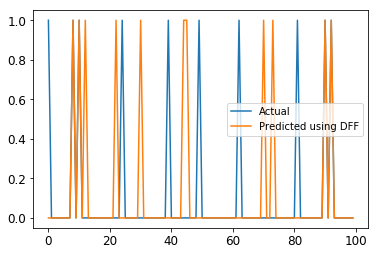

In [413]:
plt.plot(y_test[:100], label='Actual')
plt.plot(predicteddff[:100], label='Predicted using DFF')
plt.legend()
plt.show()

# Result of Deep convolutional network

# Accuracy

In [414]:
np.sum(y_test == ydcn) / len(y_test)

0.8835882495751396

# Plot

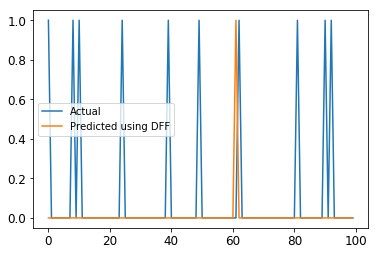

In [330]:
plt.plot(y_test[:100], label='Actual')
plt.plot(ydcn[:100], label='Predicted using DFF')
plt.legend()
plt.show()

# Result of Auto Encoder 

# Accuracy

In [422]:
np.sum(y_test == np.argmax(predictedAE,1)) / len(y_test)

0.8963340616654528

In [427]:
predictedAE=np.argmax(predictedAE,1)

# Plot

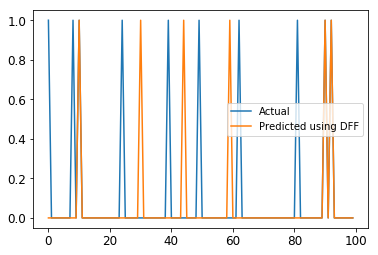

In [428]:
plt.plot(y_test[:100], label='Actual')
plt.plot(predictedAE[:100], label='Predicted using DFF')
plt.legend()
plt.show()

# Discussions about the choice of network structures

I chose the Deep feed forward, Deep convolutional network and Auto encoder for the classification on my dataset.
Following are the accuracy result I got from same test data.

1. Deep feed forward -90.7%
2. Deep convolutional network- 88.29%
3. Auto Encoder - 84.42%

It seems Deep feed forward is performing good in classifying my dataset.

# Conclusions

Discuss the challenges or somethat that you learned. 
If you have any suggestion about the assignment, you can write about it. 

I learned how to implement the neural network structure using tensorflow.network setup is easy. forward and backpropogation wil take care by tensor flow and its easy compared to assignment 4. 

# Extra Credit

- Test your program with GPUs and compare training speed. You can try [FloydHub](https://www.floydhub.com/) for free 2 hours of GPU resources. 

## Grading

DO NOT forget to submit your data! Your notebook is supposed to run fine after running your codes. 


points | | description
--|--|:--
5 | Overview| states the objective and the appraoch 
15 | Data | 
 | 5| Includes description of your data
 | 5| Plots to visualize data 
 | 5| Reading and analyzing the plots 
50 | Methods | 
 | 30| Explanation of the choice for 3 different neural network structures and reason for the selection. (10 points for each) 
 |   | Relate the choice of your data!
 | 15| Explanation of codes for each structure
 |  5| Explanation of experimental codes
25 | Results | Your Data
| 15| plots for results 
| 10| Discussions about the choice of network structures 
5 | Conclusions 